Importing Libraries

In [14]:
!pip install pandas numpy matplotlib seaborn scikit-learn tensorflow
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.callbacks import EarlyStopping


Data loading

In [15]:
# Load the dataset
data = pd.read_csv('/content/telco_customer_churn.csv')

# Display the first few rows of the dataset
print(data.head())

# Print statistics for numerical columns
print(data.describe())

# Print value counts for each categorical column
for column in data.select_dtypes(include=['object']).columns:
    print(f"Value counts for {column}:")
    print(data[column].value_counts())
    print("\n")

   SeniorCitizen  Churn  gender_Male  Partner_Yes  Dependents_Yes  \
0              1      1            1            0               1   
1              1      1            1            0               0   
2              1      1            0            1               1   
3              1      1            1            1               1   
4              0      0            1            1               1   

   random_col_0  random_col_1  random_col_2  random_col_3  random_col_4  ...  \
0      0.374540      0.950714      0.731994      0.598658      0.156019  ...   
1      0.897397      0.119381      0.327843      0.815745      0.597312  ...   
2      0.450383      0.325133      0.471110      0.818738      0.124614  ...   
3      0.452725      0.793345      0.769023      0.667756      0.854778  ...   
4      0.889960      0.467540      0.849713      0.327178      0.339570  ...   

   random_col_4985  random_col_4986  random_col_4987  random_col_4988  \
0         0.153145         0.72

Data Preprocessing

In [16]:
# Handle missing values
data = data.dropna()

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop('Churn', axis=1))

# Split data into training and testing sets
X = scaled_features
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model Training
###################################Multilayer Perceptron (MLP)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 648,321 (2.47 MB)

 Trainable params: 648,321 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5235 - loss: 0.7636 - val_accuracy: 0.5063 - val_loss: 0.7312
Epoch 2/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9963 - loss: 0.0907 - val_accuracy: 0.4969 - val_loss: 0.9268
Epoch 3/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 1.0000 - loss: 0.0061 - val_accuracy: 0.5031 - val_loss: 1.0008
Epoch 4/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 0.5094 - val_loss: 1.0589
Epoch 5/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 0.5063 - val_loss: 1.1066
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
MLP Accuracy: 47.00%
MLP Precision: 43.64%
MLP Recall: 37.70%
MLP F1 Score: 40.45%


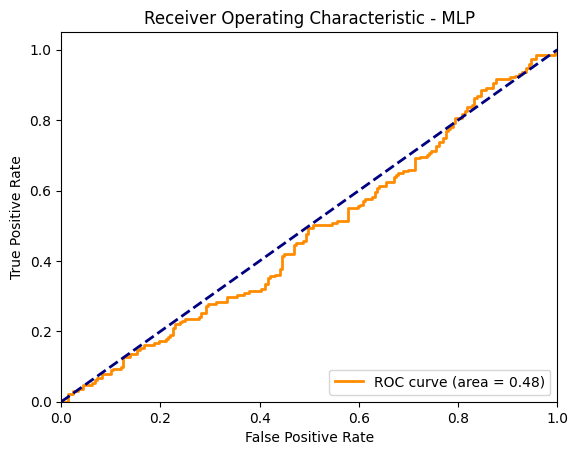

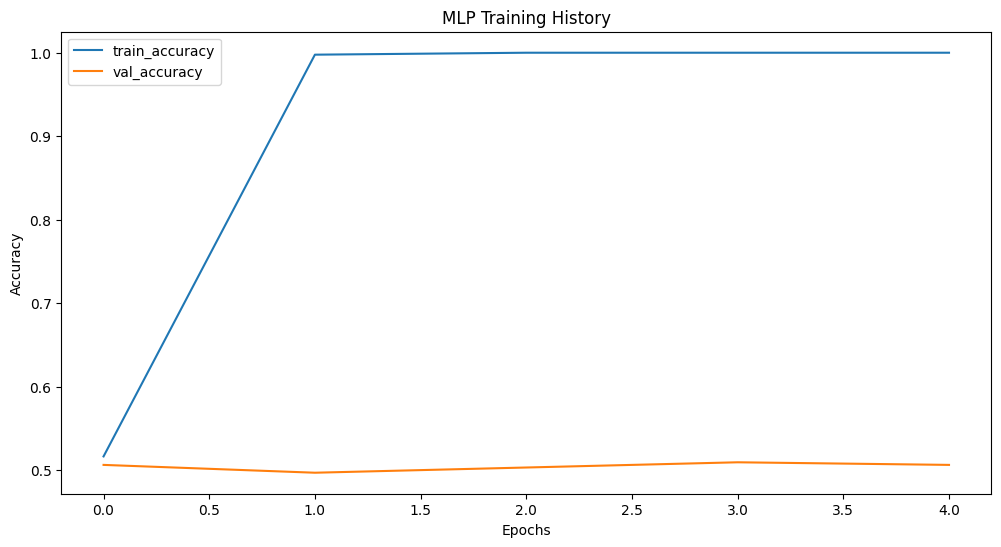

In [17]:
def create_mlp(input_shape):
    model = Sequential()
    model.add(Dense(128, input_dim=input_shape, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

mlp_model = create_mlp(X_train.shape[1])
mlp_model.summary()

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training MLP
mlp_history = mlp_model.fit(X_train, y_train, epochs=5, batch_size=8, validation_split=0.2, callbacks=[early_stopping])

# Evaluate MLP
mlp_pred = mlp_model.predict(X_test)
mlp_pred_classes = (mlp_pred > 0.5).astype("int32")

mlp_accuracy = accuracy_score(y_test, mlp_pred_classes)
mlp_precision = precision_score(y_test, mlp_pred_classes)
mlp_recall = recall_score(y_test, mlp_pred_classes)
mlp_f1 = f1_score(y_test, mlp_pred_classes)

print(f"MLP Accuracy: {mlp_accuracy * 100:.2f}%")
print(f"MLP Precision: {mlp_precision * 100:.2f}%")
print(f"MLP Recall: {mlp_recall * 100:.2f}%")
print(f"MLP F1 Score: {mlp_f1 * 100:.2f}%")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, mlp_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - MLP')
plt.legend(loc="lower right")
plt.show()

# Plot training history
def plot_history(history, title):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.legend()
    plt.show()

plot_history(mlp_history, 'MLP Training History')


 Recurrent Neural Network (RNN) with LSTM

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 4999, 128)           │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 116,033 (453.25 KB)

 Trainable params: 116,033 (453.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 1310s 8s/step - accuracy: 0.5352 - loss: 0.6922 - val_accuracy: 0.5375 - val_loss: 0.6923
Epoch 2/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 1305s 8s/step - accuracy: 0.5195 - loss: 0.6929 - val_accuracy: 0.5437 - val_loss: 0.6919
Epoch 3/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 1337s 8s/step - accuracy: 0.5360 - loss: 0.6903 - val_accuracy: 0.5562 - val_loss: 0.6926
Epoch 4/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 1327s 8s/step - accuracy: 0.5050 - loss: 0.6941 - val_accuracy: 0.5469 - val_loss: 0.6933
Epoch 5/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 1292s 8s/step - accuracy: 0.5362 - loss: 0.6900 - val_accuracy: 0.5437 - val_loss: 0.6926
13/13 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step
LSTM Accuracy: 53.00%
LSTM Precision: 54.55%
LSTM Recall: 9.42%
LSTM F1 Score: 16.07%


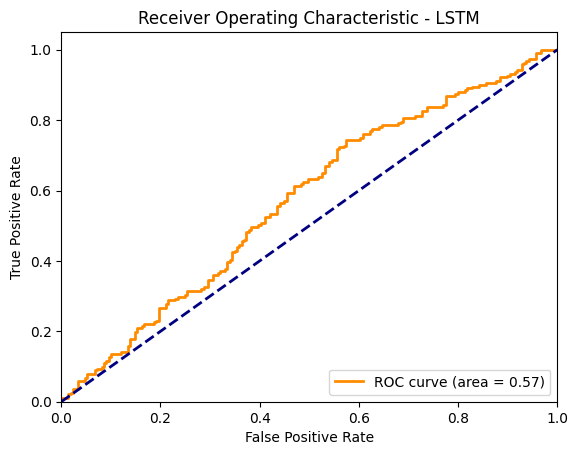

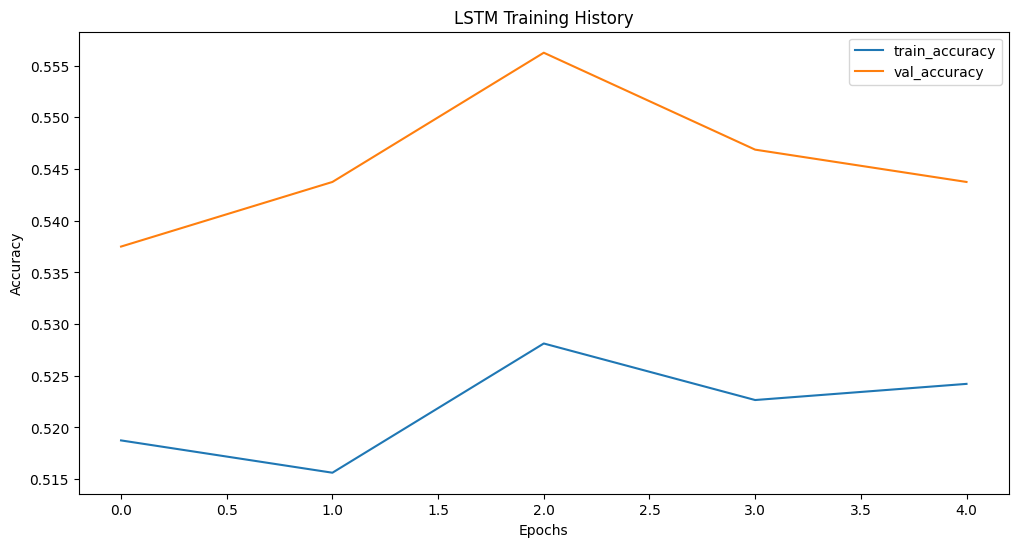

13/13 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step
LSTM Accuracy: 53.00%
LSTM Precision: 54.55%
LSTM Recall: 9.42%
LSTM F1 Score: 16.07%


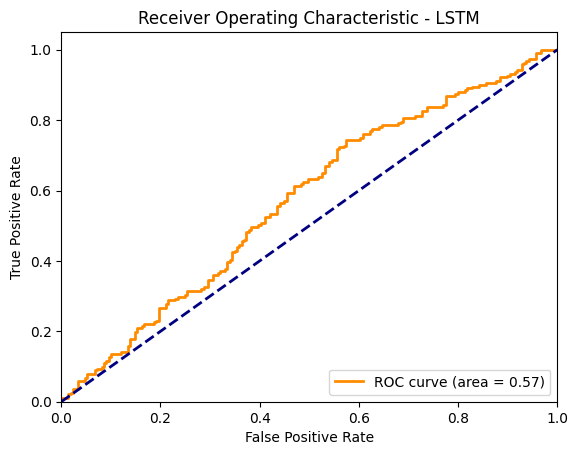

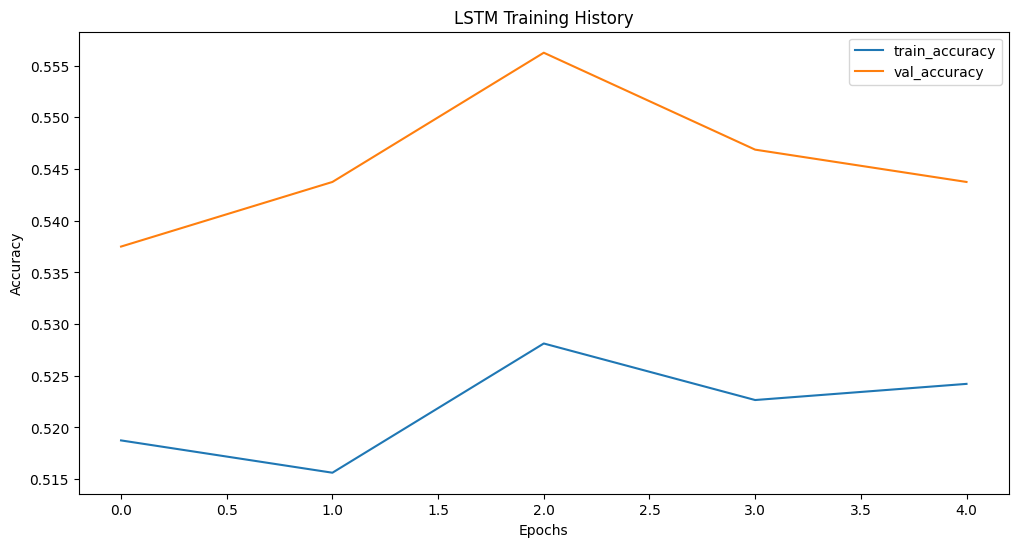

In [18]:
def create_lstm(input_shape):
    model = Sequential()
    model.add(LSTM(128, input_shape=(input_shape, 1), return_sequences=True))
    model.add(LSTM(64))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

lstm_model = create_lstm(X_train_lstm.shape[1])
lstm_model.summary()
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# Training LSTM
lstm_history = lstm_model.fit(X_train_lstm, y_train, epochs=5, batch_size=8, validation_split=0.2, callbacks=[early_stopping])
# Evaluate LSTM
lstm_pred = lstm_model.predict(X_test_lstm)
lstm_pred_classes = (lstm_pred > 0.5).astype("int32")

lstm_accuracy = accuracy_score(y_test, lstm_pred_classes)
lstm_precision = precision_score(y_test, lstm_pred_classes)
lstm_recall = recall_score(y_test, lstm_pred_classes)
lstm_f1 = f1_score(y_test, lstm_pred_classes)

print(f"LSTM Accuracy: {lstm_accuracy * 100:.2f}%")
print(f"LSTM Precision: {lstm_precision * 100:.2f}%")
print(f"LSTM Recall: {lstm_recall * 100:.2f}%")
print(f"LSTM F1 Score: {lstm_f1 * 100:.2f}%")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, lstm_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - LSTM')
plt.legend(loc="lower right")
plt.show()

plot_history(lstm_history, 'LSTM Training History')
# Evaluate LSTM
lstm_pred = lstm_model.predict(X_test_lstm)
lstm_pred_classes = (lstm_pred > 0.5).astype("int32")

lstm_accuracy = accuracy_score(y_test, lstm_pred_classes)
lstm_precision = precision_score(y_test, lstm_pred_classes)
lstm_recall = recall_score(y_test, lstm_pred_classes)
lstm_f1 = f1_score(y_test, lstm_pred_classes)

print(f"LSTM Accuracy: {lstm_accuracy * 100:.2f}%")
print(f"LSTM Precision: {lstm_precision* 100:.2f}%")
print(f"LSTM Recall: {lstm_recall* 100:.2f}%")
print(f"LSTM F1 Score: {lstm_f1* 100:.2f}%")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, lstm_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - LSTM')
plt.legend(loc="lower right")
plt.show()

plot_history(lstm_history, 'LSTM Training History')


Convolutional Neural Network (CNN)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)                    │ (None, 4998, 64)            │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 2499, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 159936)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │      20,471,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,472,257 (78.10 MB)

 Trainable params: 20,472,257 (78.10 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 73s 447ms/step - accuracy: 0.5184 - loss: 3.5065 - val_accuracy: 0.5500 - val_loss: 0.8746
Epoch 2/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 85s 467ms/step - accuracy: 0.7692 - loss: 0.4554 - val_accuracy: 0.5469 - val_loss: 1.2997
Epoch 3/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 79s 451ms/step - accuracy: 0.8920 - loss: 0.2779 - val_accuracy: 0.5469 - val_loss: 0.7883
Epoch 4/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 83s 461ms/step - accuracy: 0.9886 - loss: 0.0972 - val_accuracy: 0.5844 - val_loss: 0.9116
Epoch 5/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 72s 451ms/step - accuracy: 1.0000 - loss: 0.0302 - val_accuracy: 0.5437 - val_loss: 1.0278
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step
CNN Accuracy: 47.00%
CNN Precision: 45.41%
CNN Recall: 54.45%
CNN F1 Score: 49.52%


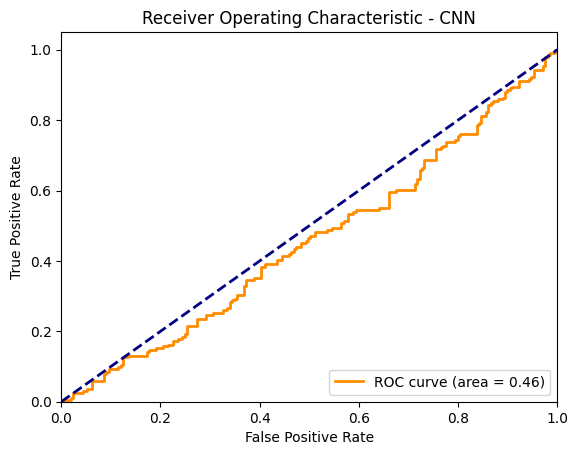

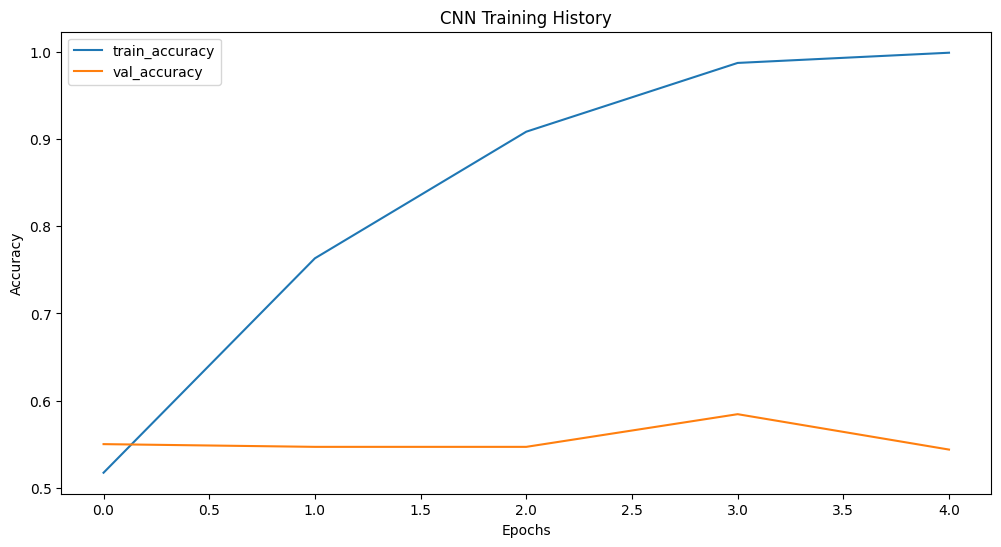

In [19]:
def create_cnn(input_shape):
    model = Sequential()
    model.add(Conv1D(64, kernel_size=2, activation='relu', input_shape=(input_shape, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

cnn_model = create_cnn(X_train_cnn.shape[1])
cnn_model.summary()
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# Training CNN
cnn_history = cnn_model.fit(X_train_cnn, y_train, epochs=5, batch_size=8, validation_split=0.2, callbacks=[early_stopping])
# Evaluate CNN
cnn_pred = cnn_model.predict(X_test_cnn)
cnn_pred_classes = (cnn_pred > 0.5).astype("int32")

cnn_accuracy = accuracy_score(y_test, cnn_pred_classes)
cnn_precision = precision_score(y_test, cnn_pred_classes)
cnn_recall = recall_score(y_test, cnn_pred_classes)
cnn_f1 = f1_score(y_test, cnn_pred_classes)

print(f"CNN Accuracy: {cnn_accuracy* 100:.2f}%")
print(f"CNN Precision: {cnn_precision* 100:.2f}%")
print(f"CNN Recall: {cnn_recall* 100:.2f}%")
print(f"CNN F1 Score: {cnn_f1* 100:.2f}%")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, cnn_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - CNN')
plt.legend(loc="lower right")
plt.show()

plot_history(cnn_history, 'CNN Training History')


Model prediction

  Model  Accuracy  Precision    Recall  F1 Score
0   MLP      0.47   0.436364  0.376963  0.404494
1   RNN      0.53   0.545455  0.094241  0.160714
2   CNN      0.47   0.454148  0.544503  0.495238


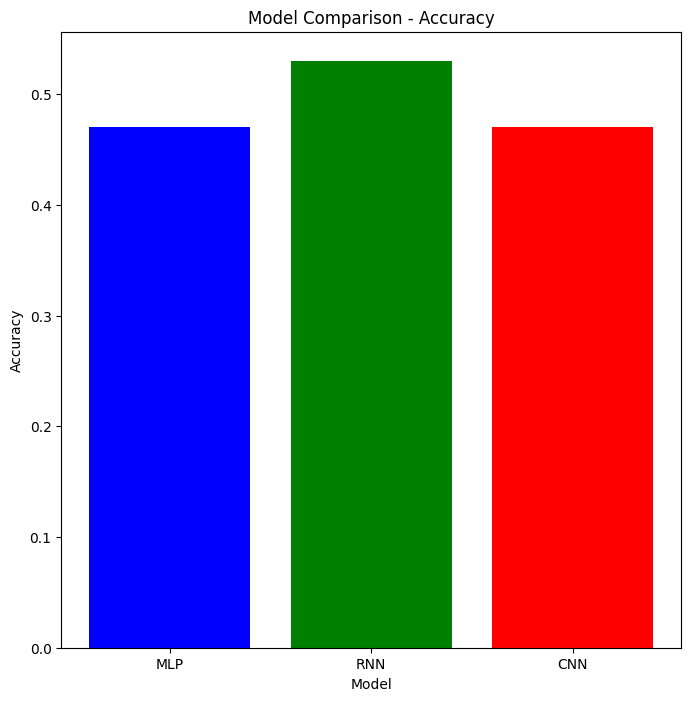

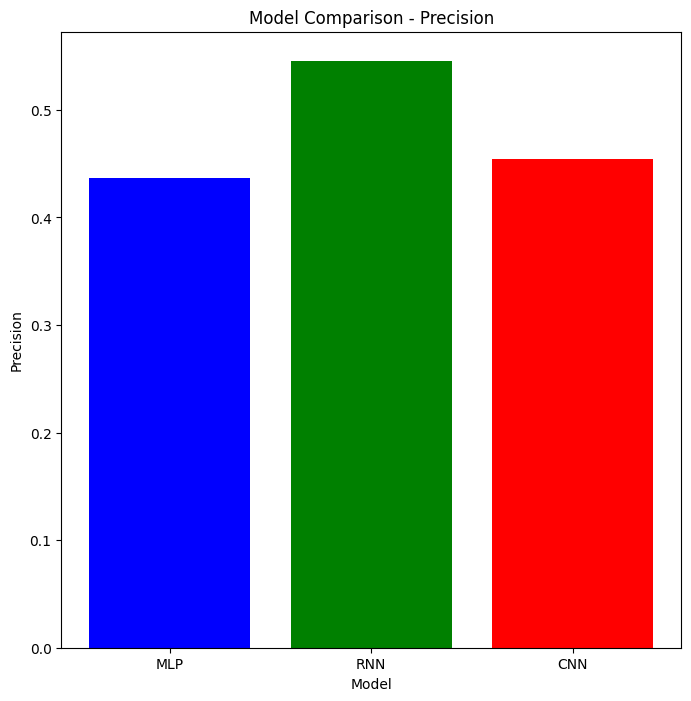

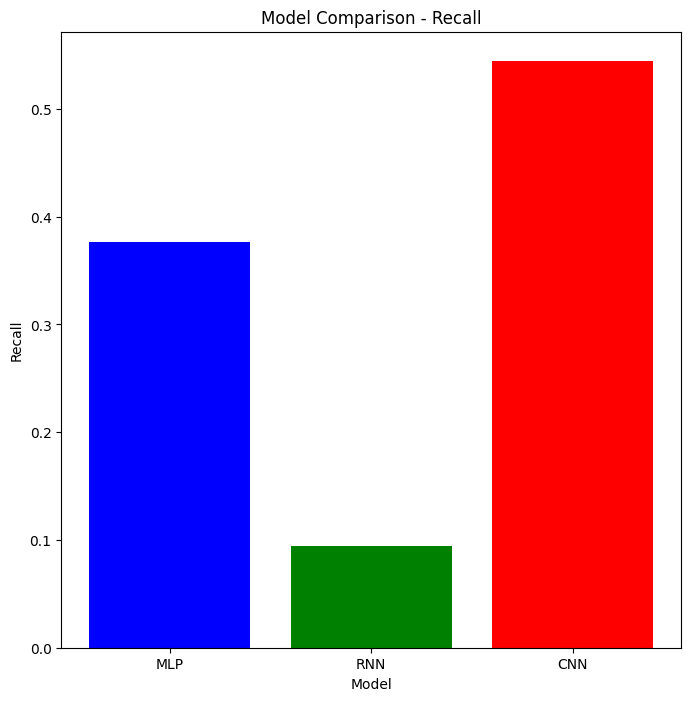

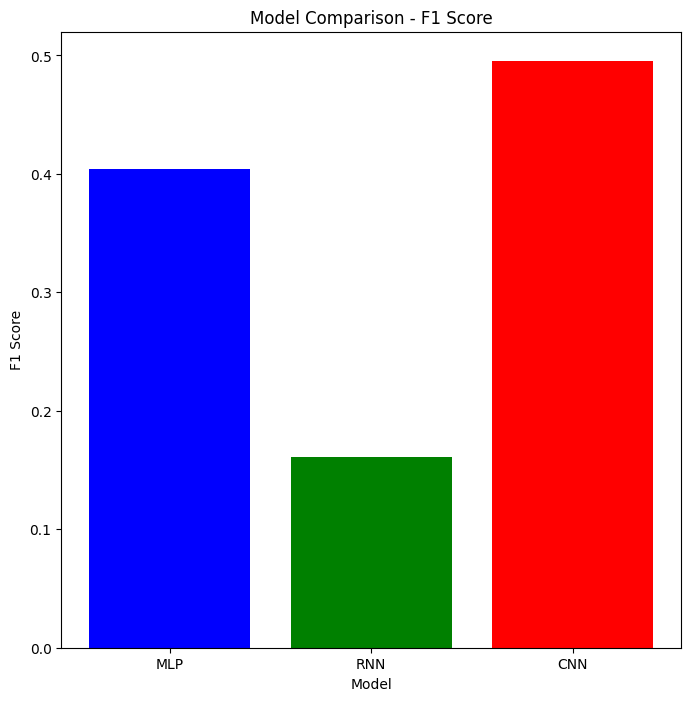

Model: MLP, Predictions: [0 0 0 0 0]
Model: RNN, Predictions: [0 0 0 0 0]
Model: CNN, Predictions: [1 0 1 1 0]


In [22]:
# Compare model metrics
models_metrics = pd.DataFrame({
    'Model': ['MLP', 'RNN', 'CNN'],
    'Accuracy': [mlp_accuracy, lstm_accuracy, cnn_accuracy],
    'Precision': [mlp_precision, lstm_precision, cnn_precision],
    'Recall': [mlp_recall, lstm_recall, cnn_recall],
    'F1 Score': [mlp_f1, lstm_f1, cnn_f1]
})

print(models_metrics)

# Plotting model metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
models = ['MLP', 'RNN', 'CNN']

for metric in metrics:
    plt.figure(figsize=(8, 8))
    plt.bar(models, models_metrics[metric], color=['blue', 'green', 'red'])
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.title(f'Model Comparison - {metric}')
    plt.show()

# Print model names with predictions
for model_name, preds in zip(models, [mlp_pred_classes, lstm_pred_classes, cnn_pred_classes]):
    print(f"Model: {model_name}, Predictions: {preds.flatten()[:5]}")